# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename)

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

I chose the World Happiness Report (WHR) data set to predict if the people from a country are generous. It is a supervised learning problem dealing with binary classification where '0' correlates to 'Not Generous' and '1' correlates to 'Generous'. The features I'm planning to use for this problem are : 

'country', 'Life Ladder', 'Social support', 'Log GDP per capita', 'Freedom to make life choices', 'Perceptions of corruption', 'GINI index (World Bank estimate)'. 

Companies could find value in this model because of it's likeliness to predict how generous a customer might be. Generous customers are likely to spend more on products or services. This can directly boost the company's revenue and profitability.




## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
list(df.columns)

['country',
 'year',
 'Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect',
 'Confidence in national government',
 'Democratic Quality',
 'Delivery Quality',
 'Standard deviation of ladder by country-year',
 'Standard deviation/Mean of ladder by country-year',
 'GINI index (World Bank estimate)',
 'GINI index (World Bank estimate), average 2000-15',
 'gini of household income reported in Gallup, by wp5-year']

In [4]:
df.dtypes

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

In [5]:
df.head(15)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
5,Afghanistan,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,NaN,0.304368
6,Afghanistan,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,NaN,NaN,0.413974
7,Afghanistan,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,NaN,NaN,0.596918
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
9,Afghanistan,2017,2.661718,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,NaN,NaN,1.454051,0.546283,NaN,NaN,0.286599


In [6]:
df.shape

(1562, 19)

In [7]:
#see correlation between all columns
df.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
year,1.000000,-0.014505,0.051140,-0.052845,0.100904,0.134332,-0.014111,-0.051141,-0.024730,0.171805,-0.018925,-0.017400,-0.011016,0.273838,0.209680,-0.053342,-0.026927,0.071773
Life Ladder,-0.014505,1.000000,0.779476,0.700299,0.729852,0.526058,0.204910,-0.425013,0.554462,-0.267492,-0.085543,0.607034,0.706673,-0.154257,-0.756076,-0.097255,-0.172745,-0.294080
Log GDP per capita,0.051140,0.779476,1.000000,0.658591,0.841612,0.362998,-0.000334,-0.350142,0.311868,-0.120597,-0.162000,0.630107,0.770370,-0.086494,-0.566376,-0.342142,-0.314639,-0.355850
Social support,-0.052845,0.700299,0.658591,1.000000,0.586759,0.418213,0.077543,-0.217857,0.459656,-0.352552,-0.160353,0.536387,0.545010,-0.174091,-0.594465,-0.148387,-0.128284,-0.314072
Healthy life expectancy at birth,0.100904,0.729852,0.841612,0.586759,1.000000,0.340026,0.047079,-0.311037,0.297759,-0.105255,-0.188827,0.597106,0.721081,-0.065870,-0.526026,-0.306798,-0.364279,-0.422890
Freedom to make life choices,0.134332,0.526058,0.362998,0.418213,0.340026,1.000000,0.357158,-0.496932,0.615916,-0.284391,0.408096,0.445323,0.486678,-0.081104,-0.369111,0.044033,0.057697,0.108313
Generosity,-0.014111,0.204910,-0.000334,0.077543,0.047079,0.357158,1.000000,-0.305019,0.380896,-0.117508,0.275648,0.118966,0.203871,-0.182119,-0.193145,-0.016602,-0.043810,0.194036
Perceptions of corruption,-0.051141,-0.425013,-0.350142,-0.217857,-0.311037,-0.496932,-0.305019,1.000000,-0.302946,0.267359,-0.436614,-0.322063,-0.514183,0.301730,0.378509,0.158565,0.170775,-0.043064
Positive affect,-0.024730,0.554462,0.311868,0.459656,0.297759,0.615916,0.380896,-0.302946,1.000000,-0.384112,0.144219,0.369666,0.365544,-0.069609,-0.410061,0.371113,0.298045,0.121792
Negative affect,0.171805,-0.267492,-0.120597,-0.352552,-0.105255,-0.284391,-0.117508,0.267359,-0.384112,1.000000,-0.159316,-0.198636,-0.211019,0.510342,0.520042,0.171791,0.074559,0.148413


In [8]:
# check if df has missing values
np.sum(df.isnull(), axis = 0)

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After looking at the correlation between my label & all the features, it was best to remove the columns with too many missing features & columns that didn't correlate much with the label. With that in mind, I only kept the GINI index with the lowest missing variables, as well as removing 'Perceptions of corruption' because of its low correlation rate. The following features were included:

'Happiness', 'LogGDP', 'Support', 'Freedom', 'Generosity',
'Positive', 'Negative', 'Trust in Gov', 'Democratic Quality', 'GINI'


Some data preparation techniques that will be useful to prepare the data for modeling would be:

    - addressing missingness for the features that are kept
    - selecting appropriate features and removing irrelevant features
    - renaming features and labels
    - addressing class imbalance in the data sample with data aggregation
    - scale the data  


There will be training, testing and evaluation of two Regression models. The first is a linear regression model and the second a Decision Tree.
The LinearRegression class from Scikit-learn will create the linear regression model, then fit the model on the training data using train_test_split from Scikit-learn.
The DecisionTreeRegressor class from Scikit-learn is imported to create and train the decision tree model.
To evaluate the model the Mean Squared Error & R2 packages will be used.
Finally to tune, Grid Search from Scikit-learn will help find the best hyperparameters.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [9]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [10]:
# remove columns with many missing variables & columns we wont use
df.drop (columns = ['country', 'year','Delivery Quality',
                    'GINI index (World Bank estimate)',
                    'Perceptions of corruption',
                    'Healthy life expectancy at birth',
                    'Standard deviation of ladder by country-year',
                    'Standard deviation/Mean of ladder by country-year',
                    'gini of household income reported in Gallup, by wp5-year'], inplace=True)

np.sum(df.isnull(), axis=0)

Life Ladder                                            0
Log GDP per capita                                    27
Social support                                        13
Freedom to make life choices                          29
Generosity                                            80
Positive affect                                       18
Negative affect                                       12
Confidence in national government                    161
Democratic Quality                                   171
GINI index (World Bank estimate), average 2000-15    176
dtype: int64

In [11]:
# remove all rows with missing values
df = df.dropna()
np.sum(df.isnull(),axis=0)

Life Ladder                                          0
Log GDP per capita                                   0
Social support                                       0
Freedom to make life choices                         0
Generosity                                           0
Positive affect                                      0
Negative affect                                      0
Confidence in national government                    0
Democratic Quality                                   0
GINI index (World Bank estimate), average 2000-15    0
dtype: int64

In [12]:
# perform data aggregation
df = df.groupby(['Life Ladder',]).mean().reset_index()
df.head(15)

,Life Ladder,Log GDP per capita,Social support,Freedom to make life choices,Generosity,Positive affect,Negative affect,Confidence in national government,Democratic Quality,"GINI index (World Bank estimate), average 2000-15"
0,2.693061,6.473706,0.290184,0.624057,0.058877,0.578654,0.494268,0.748755,-1.433271,0.499000
1,2.701591,6.665998,0.637666,0.671431,-0.008702,0.505067,0.388489,0.472788,-0.519526,0.348500
2,2.807855,7.077162,0.291334,0.286814,-0.056087,0.362498,0.378715,0.170061,-0.578871,0.437333
3,2.838959,7.181850,0.444339,0.663193,-0.080324,0.582750,0.442813,0.477110,-0.466808,0.437333
4,2.888112,7.461286,0.532152,0.439919,0.017067,0.614771,0.549257,0.456288,-2.044661,0.463000
5,2.902734,7.856815,0.637756,0.775485,0.170367,0.693552,0.245986,0.899561,-0.293202,0.384667
6,2.936221,7.117882,0.302955,0.584088,-0.067709,0.480281,0.395363,0.512032,-0.533160,0.437333
7,2.982674,7.878930,0.668683,0.609981,-0.145431,0.507435,0.321357,0.263297,-2.101797,0.357000
8,2.997251,7.053099,0.590737,0.716396,0.160101,0.533604,0.369601,0.687578,-0.189854,0.371000
9,3.174264,7.102516,0.843475,0.343556,-0.063873,0.630983,0.250060,0.181594,-1.381488,0.432000


In [13]:
# scale numerical data to nomalize & have 0 mean
scaler = StandardScaler()
df_scale = df.select_dtypes(float)
data = scaler.fit_transform(df_scale)
df_scaled = pd.DataFrame(data,columns=df_scale.columns,index=df_scale.index)
df_scaled

,Life Ladder,Log GDP per capita,Social support,Freedom to make life choices,Generosity,Positive affect,Negative affect,Confidence in national government,Democratic Quality,"GINI index (World Bank estimate), average 2000-15"
0,-2.367542,-2.258480,-4.281772,-0.678636,0.381897,-1.220047,3.059860,1.484049,-1.617807,1.270176
1,-2.360068,-2.094641,-1.420974,-0.344604,-0.037621,-1.898367,1.681495,0.012850,-0.531241,-0.493452
2,-2.266960,-1.744313,-4.272309,-3.056498,-0.331786,-3.212575,1.554134,-1.601014,-0.601809,0.547538
3,-2.239707,-1.655115,-3.012624,-0.402687,-0.482242,-1.182289,2.389375,0.035888,-0.468551,0.547538
4,-2.196639,-1.417025,-2.289666,-1.976972,0.122344,-0.887121,3.776396,-0.075116,-2.344833,0.848312
...,...,...,...,...,...,...,...,...,...,...
1121,2.081287,1.335589,1.356090,1.574652,1.452080,0.680456,-1.366687,0.620066,1.622267,-1.447441
1122,2.086275,1.543372,1.124636,1.587324,0.796898,1.365176,-1.087258,1.596991,1.905007,-0.738702
1123,2.096810,1.343394,1.247078,1.512106,1.793718,0.538585,-1.101901,0.007706,1.663340,-1.447441
1124,2.137116,1.380384,1.185042,1.493252,1.435078,1.077138,-0.848582,0.651075,1.629679,-1.447441


In [14]:
# rename & simplify column names
new_names_dict = {'Log GDP per capita': 'LogGDP',
            'Life Ladder':'Happiness',
            'Social support': 'Support',  
            'Freedom to make life choices': 'Freedom', 
            'Confidence in national government': 'Trust in Gov', 
            'Positive affect': 'Positive', 
            'Negative affect': 'Negative',
            'GINI index (World Bank estimate), average 2000-15': 'GINI'}

df = df.rename(columns=new_names_dict)
df.columns

Index(['Happiness', 'LogGDP', 'Support', 'Freedom', 'Generosity', 'Positive',
       'Negative', 'Trust in Gov', 'Democratic Quality', 'GINI'],
      dtype='object')

In [15]:
# re-check correlation between current features & label
corrs = df.corr()['Generosity'].drop(['Generosity'],axis=0)

corrs_sort = corrs.sort_values(ascending = False)
corrs_sort

Positive              0.405561
Freedom               0.351052
Trust in Gov          0.241144
Happiness             0.228589
Democratic Quality    0.089462
Support               0.089370
LogGDP               -0.013309
GINI                 -0.048927
Negative             -0.149873
Name: Generosity, dtype: float64

In [16]:
# extract the 2 features that are most correlated with the label
top_2_corr = list(corrs_sort[:2].index)

# find the correlation between both features
corr_feat = df['Positive'].corr(df['Freedom'])
corr_feat

0.6098110959727706

In [17]:
# visualize the correlation between both features
df_corr = pd.DataFrame({'Positive': df['Positive'], 'Freedom':df['Freedom']})
df_corr

,Positive,Freedom
0,0.578654,0.624057
1,0.505067,0.671431
2,0.362498,0.286814
3,0.582750,0.663193
4,0.614771,0.439919
...,...,...
1121,0.784827,0.943631
1122,0.859107,0.945428
1123,0.769436,0.934760
1124,0.827860,0.932086


<AxesSubplot: >

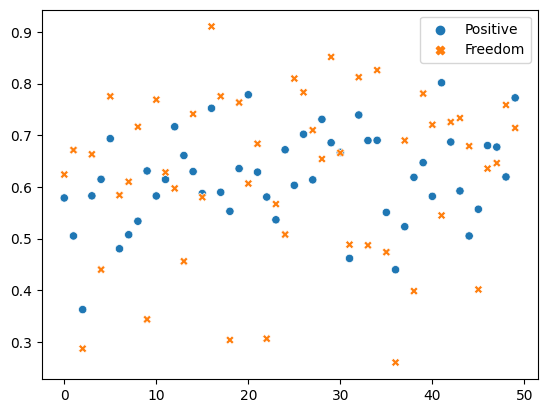

In [18]:
# produce plot to see correlation
sns.scatterplot(data=df_corr[:50])

The features 'Positive' and 'Freedom' show a moderately strong correlation with 'Generosity' and with each other, making them suitable candidates for the machine learning model.

In [19]:
# create labeled examples from data
y = df['Generosity']
X = df.drop(columns = 'Generosity', axis=1)

In [20]:
# create training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [21]:
# train, test & evaluate a Linear Regression Model
lr_model = LinearRegression()

# fit model
lr_model.fit(X_train, y_train)

# test model
y_lr_pred = lr_model.predict(X_test)

In [22]:
# compute the mean squared error
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)
lr_r2 = r2_score(y_test, y_lr_pred)

print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 0.14694967680732052
[LR] R2: 0.302104744980327


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [23]:
# train, test & evaluate a Decision Tree Model
param_grid = {'max_depth':[2, 4, 6, 8, 10], 'min_samples_leaf':[10, 25, 50, 100]}

dt_regressor = DecisionTreeRegressor()
dt_grid = GridSearchCV(dt_regressor, param_grid, cv=3,
                       scoring='neg_root_mean_squared_error')
dt_grid_search = dt_grid.fit(X_train, y_train)

rmse_DT = -1 * dt_grid_search.best_score_
print("[DT] RMSE for the best model is : {:.2f}".format(rmse_DT) )

[DT] RMSE for the best model is : 0.13


In [24]:
# best model hyperparameters according to grid search
dt_best_params = dt_grid_search.best_params_
dt_best_params

{'max_depth': 6, 'min_samples_leaf': 10}

In [25]:
# create a decision tree model with the best hyperparameters
dt_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'],
                                 min_samples_leaf=dt_best_params['min_samples_leaf'])
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=10)

In [26]:
# test dt_model & evaluate
y_dt_pred = dt_model.predict(X_test)
dt_rmse=mean_squared_error(y_test, y_dt_pred, squared=False)
dt_r2=r2_score(y_test, y_dt_pred)
print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

[DT] Root Mean Squared Error: 0.12405321398324172
[DT] R2: 0.5026421052215544


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


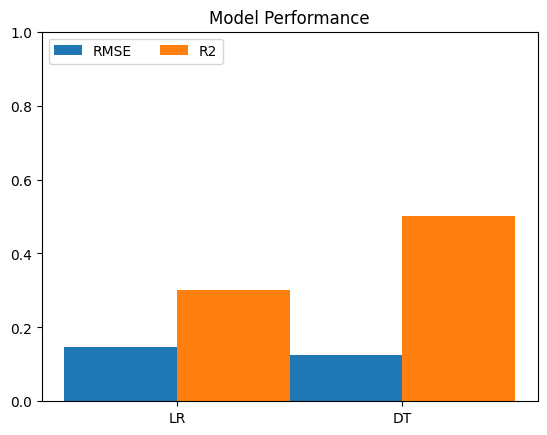

In [29]:
# visualize & compare models
RMSE_Results = [lr_rmse, dt_rmse]
R2_Results = [lr_r2, dt_r2]

rg= np.arange(2)
width = 0.50

plt.bar(rg, RMSE_Results, width, label='RMSE')
plt.bar(rg+width, R2_Results, width, label='R2')

labels = ['LR', 'DT']
plt.xticks(rg + width/2, labels)
plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

The RMSE, indicated by the blue bars, is lower for LR, suggesting it has less prediction error compared to DT, which has a higher RMSE. LR performs better in terms of minimizing error, while DT excels in explaining the variance.